just how our imagination works on pictionary, the algorithm works on geometry for solution generation

# the postmaster problem

step upgrade to the TSP problem where only one route had to be optimized for just one person whereas not multiple people with multiple routes need to be optimized

Simplest solution is to simply calculate distance from the assigned. house to all the post offices and then assign it to the shortest post office.

few weaknesses about this approach are that it is laborous to do this for every delivery, doing calculations on a house level wont give knowledge of area

a more elegant way to handle this problem is to simply consider the map as a whole and then divide it into distinct regions, each of which represents one post office's assigned service area

### A diagram that subdivides a map into regions of closest proximity, is called a Vornoi diagram

#### We will be focusing on generating a Vornoi diagram for the postmaster problem

# Traiangles 

In [1]:
point = [0.2, 0.8]

In [2]:
triangle = [[0.2, 0.8], [0.5,0.2], [0.8,0.7]]

In [59]:
# making a function that takes 3 points and returns them as one list

def points_to_triangle(point1,point2,point3):
    triangle = [list(point1),list(point2),list(point3)]
    return(triangle)

In [60]:
#Now we will use the same function we used last time that takes in points and makes a line out of them
def genlines(listpoints,itinerary):
    lines = []
    for j in range(len(itinerary)-1):
        lines.append([listpoints[itinerary[j]],listpoints[itinerary[j+1]]])
    return(lines)

In [61]:
# Now we will have a simple plotting function

import pylab as pl
from matplotlib import collections as mc
def plot_triangle_simple(triangle, thename):
    fig, ax = pl.subplots()
    
    xs = [triangle[0][0], triangle[1][0], triangle[2][0]]
    ys = [triangle[0][1], triangle[1][1], triangle[2][1]]
    
    itin= [0,1,2,0]
    
    thelines = genlines(triangle, itin)
    
    lc = mc.LineCollection(genlines(triangle, itin), linewidths = 2)
    
    ax.add_collection(lc)
    
    ax.margins(0.1)
    pl.scatter(xs, ys)
    pl.savefig(str(thename)+'.png')
#     pl.close()

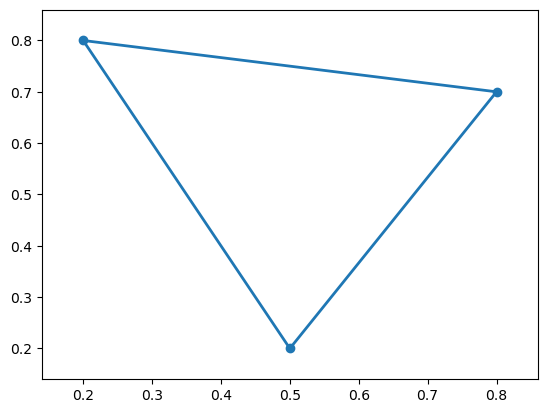

In [62]:
plot_triangle_simple(points_to_triangle((0.2,0.8),(0.5,0.2),(0.8,0.7)), 'tri')

In [63]:
def get_distance(point1,point2):
    distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return(distance)

 Now we will write a function that finds the circumcentre and circumradius for any given triangle
 
 this function will rely on a concept called conversion to complex numbers

In [65]:
def triangle_to_circumcenter(triangle):
    x,y,z = complex(triangle[0][0],triangle[0][1]), complex(triangle[1][0],triangle[1][1]), \
    complex(triangle[2][0],triangle[2][1])
    w = z - x
    w /= y - x
    c = (x-y) * (w-abs(w)**2)/2j/w.imag - x
    radius = abs(c + x)
    return((0 - c.real,0 - c.imag),radius)

In [66]:
def plot_triangle(triangles,centers,radii,thename):
    fig, ax = pl.subplots()
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    for i in range(0,len(triangles)):
        triangle = triangles[i]
        center = centers[i]
        radius = radii[i]
        itin = [0,1,2,0]
        thelines = genlines(triangle,itin)
        xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
        ys = [triangle[0][1],triangle[1][1],triangle[2][1]]
        lc = mc.LineCollection(genlines(triangle,itin), linewidths = 2)
        ax.add_collection(lc)
        ax.margins(0.1)
        pl.scatter(xs, ys)
        pl.scatter(center[0],center[1])
        circle = pl.Circle(center, radius, color = 'b', fill = False)
        ax.add_artist(circle)
    pl.savefig(str(thename) + '.png')

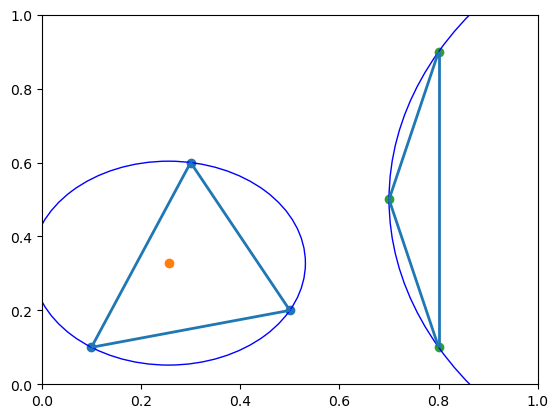

In [67]:
triangle1 = points_to_triangle((0.1,0.1),(0.3,0.6),(0.5,0.2))
center1,radius1 = triangle_to_circumcenter(triangle1)
triangle2 = points_to_triangle((0.8,0.1),(0.7,0.5),(0.8,0.9))
center2,radius2 = triangle_to_circumcenter(triangle2)
plot_triangle([triangle1,triangle2],[center1,center2],[radius1,radius2],'two')

In [11]:
# Now making the first major algorithm for this chapter

# Delaunay Triangle

this is the generation of as many triangles possible as we can from the points given to the function

for example there are 42 possible ways to create triangles from a hexagon

# The algorithm that we will be using is the Bowyer-Watson algorithm

### It is specifically designed to take a set of points as input and output a Delaunay Triangle

A Delaynay triangle aims to AVOID narrow, sliver triangles. It tends to output triangles that are somewhere close to equilateral triangles.

As we know that equilateral traingles have somewhat relatively small circumcircles and silver triangles have larger circumcircles

the large circumcircles of silver triangles would be very likely to encompass one or more of the other points of other triangles in the set, so a rule stating that no point inside any circumcircle leads to a relatively few silver triangles

# Incrementally generating Delaunay triangles

First we will be writing a code for a function that takes an existing DT of n points and also one point that we want to add to it, and outputs a DT of n+1 points.

This "Delaunay Expanding function" will get us very close to being able to write a full DT function

first suppose that we have a DT of 9 points and we want to add a 10th point

a DT has one rule, no point can lie within a circumcirle of any of its triangles. so we check the circumcircle of every circly in our existing DT, to determine whether point 10 lies in any of them.
we find that point 10 lies in the circum circle of 3 of the triangles, so the triangles are no longer allowed to be in the DT so we delete them

Since now we need to fill the hole that we have created, and make sure that the 10th point is connected to other points, we can simply describe the solution by adding an edge connecting point 10 to every vertex of the largest empty polygon that point 10 lies within

Now we have a 10 point DT

## Implementation of Delaunay Triangulations

In [68]:
delaunay = [points_to_triangle((0.2,0.8),(0.5,0.2),(0.8,0.7))]
# now we will define a point that we want to add
point_to_add = [0.5,0.5]

we first need to determine which, if any, triangles in the existing DT are now invalid so we will do the following

1. Use a loop to iterate over every triangle in the existing 
2. for each triangle, find the circumcenter and radius of its circumcircle
3. Find the distance between the point_to_add and this circumcenter
4. If this distance is less than circumradius, then the new point is inside the triangle's circumcircle. We can then conclude this triangle is invalid and needs to be removed from the DT

import math

invalid_triangles = []

delaunay_index = 0

while delaunay_index < len(delaunay):

    circumcenter, radius = 
    
triangle_to_circumcenter(delaunay[delaunay_index])

    new_distance = get_distance(circumcenter, point_to_add)
    
    if new_distance<radius:
    
        invalid_triangles.append(delaunay[delaunay_index])
    
    delaunay_index +=1

this snippet creates an empty list called invalid_triangles, loops through every existing existing triangle in DT, and checks whether a particular DT is invalid

now we have a list of invalid triangles. Since they are invalid, we want to remove them. Eventually we will also have to new triangles to our DT

# This code will remove all invalid triangles from out DT and we also get a collection of all the points that make them up

points_in_invalid = []

for i in range(len(invalid_triangles)):
    
    delaunay.remove(invalid_triangles[i])
    
    for j in range(0, len(invalid_triangles[i])):
        
        points_in_invalid.append(invalid_triangles[i][j])
        
points_in_invalid = [list(x) for x in set(tuple(x) for x in points_in_invalid)]

we first create an empty list called points_in_invalid(). Then we loop through invalid_triangles, using pythons remove() method to take each invalid triangle out of the existing DT. We then loop through every point in the triangle to add it to the points in invalid list. Finally since we may have added some duplicate points to the points in invalid list, we will use a list comprehension to re-create points in invalid with only unique values.

The final step in our algorithm is the trickiest one, we have to add new triangles to replace the invalid ones. Each new triangle will have the point_to_add as one of its points, and 2 points from the existing DT as its other points. However we cant add every possible combination of point_to_add and 2 existing points

In [69]:
def gen_delaunay(points):
    delaunay = [points_to_triangle([-5,-5],[-5,10],[10,-5])]
    number_of_points = 0
    
    while number_of_points < len(points):
        point_to_add = points[number_of_points]
        
        delaunay_index = 0
        
        invalid_triangles = []
        while delaunay_index < len(delaunay):
            circumcenter, radius = triangle_to_circumcenter(delaunay[delaunay_index])
            new_distance = get_distance(circumcenter, point_to_add)
            if(new_distance<radius):
                invalid_triangles.append(delaunay[delaunay_index])
            delaunay_index += 1
            
        points_in_invalid = []
        for i in range(0, len(invalid_triangles)):
            delaunay.remove(invalid_triangles[i])
            for j in range(0, len(invalid_triangles[i])):
                points_in_invalid.append(invalid_triangles[i][j])
        points_in_invalid = [list(x) for x in set(tuple(x) for x in points_in_invalid)]
        
        for i in range(0, len(points_in_invalid)):
            for j in range(i+1, len(points_in_invalid)):
                # Count the number of times both of these are in the bad triangles
                count_occurences = 0
                for k in range(0, len(invalid_triangles)):
                    count_occurences += 1 * (points_in_invalid[i] in invalid_triangles[k]) * (points_in_invalid[j] in invalid_triangles[k])
                if count_occurences == 1:
                    delaunay.append(points_to_triangle(points_in_invalid[i], points_in_invalid[j], point_to_add))
                    
        number_of_points += 1
    return delaunay

We can easily call this function to generate a DT for any collection of points. In the following code, we specify a number for N and generate N random points (x and y values), then we zip the x and y values, put them together into a list, pass them to our gen_delaunay(0 funcyion and get back a full valid DT that we store in a variable called the_delaunay)

In [70]:
N = 15
import numpy as np
np.random.seed(5201314)
xs = np.random.rand(N)
ys = np.random.rand(N)
points = zip(xs, ys)
listpoints = list(points)
the_delaunay = gen_delaunay(listpoints)

# From Delaunay to Voronoi

WE have completed our DT generation algorithm, The voronoi diagram generation algorithm is within our grasp, we can turn a set of points into a Voronoi diagram by following this algorithm

1. Find the DT set of points

2. Take the circumcenter of every triangle in the DT.

3. Draw lines connecting the circumcenters of all triangles in the DT that share an edge

we already know how to do step 1 and we can accomplish the step 2 with the function triangle_to_circumcenter()

we are storing our triangles as collection of points and not edges.
But it is still easy to check whether 2 of our triangles share an edge; we just check whether they share exactly 2 points. If they share only one point then they have vertices that meet but no common edge. If they share 3 points means they are same triangle and will have the same circumcenter.

our code will loop through every triangle and for each triangle, it will loop through every triangle again, and check the number of points that the 2 triangles share.

If the number of common points is exactly 2, then it will add a line between the circumcenters of the triangles in question. The lines between the circumcenters will be the boundaries of our voronoi diagram. 

#### the following code snippet will do exactly that and its pretty simple

for j in range(len(triangles)):
    
    commonpoints = 0
    
    for k in range(len(triangles[i])):
        
        for n in range(len(triangles[j])):
            
            if triangles[i][k] == triangles[j][n]:
                
                commonpoints+=1
    
    if commonpoints == 2:
        
        lines.append([list(centers[i][0]), list(centers[j][0])])

we will add this code now in our plotting function as follows

In [78]:
def plot_triangle_circum(triangles, centers, plotcircles, plotpoints, plottriangles, plotvoronoi, plotvpoints, thename):
    fig, ax = pl.subplots()
    ax.set_xlim([-1,1.1])
    ax.set_ylim([-1, 1.1])
    
    lines = []
    for i in range(0, len(triangles)):
        triangle = triangles[i]
        center = centers[i][0]
        radius = centers[i][1]
        itin = [0,1,2,0]
        thelines = genlines(triangle, itin)
        xs = [triangle[0][0], triangle[1][0], triangle[2][0]]
        ys = [triangle[0][1], triangle[1][1], triangle[2][1]]
        
        lc = mc.LineCollection(genlines(triangle, itin), linewidths = 2)
        if(plottriangles):
            ax.add_collection(lc)
        if(plotpoints):
            pl.scatter(xs,ys)
        ax.margins(0.1)
        if(plotvpoints):
            pl.scatter(center[0], center[1])
        
        circle = pl.Circle(center, radius, color = 'b', fill = False)
        if plotcircles:
            ax.add_artist(circle)
        
        if plotvoronoi:
            for j in range(0, len(triangles)):
                commonpoints = 0
                for k in range(0, len(triangles[i])):
                    for n in range(0, len(triangles[j])):
                        if triangles[i][k] == triangles[j][n]:
                            commonpoints +=1
                if commonpoints == 2:
                    lines.append([list(centers[i][0]), list(centers[j][0])])
        
        lc = mc.LineCollection(lines, linewidths = 1)
        
        ax.add_collection(lc)
        
    pl.savefig(str(thename)+'.png')

we are almost ready to call this plotting function and see our final voronoi diagram. However first we need to get the circumcenters of every triangle in our DT. Luckily this is very easy, we can create an empty list called circumcenters and append the circumcenter of every triangle in our DT to that list as follows

In [79]:
circumcenters = []
for i in range(0, len(the_delaunay)):
    circumcenters.append(triangle_to_circumcenter(the_delaunay[i]))

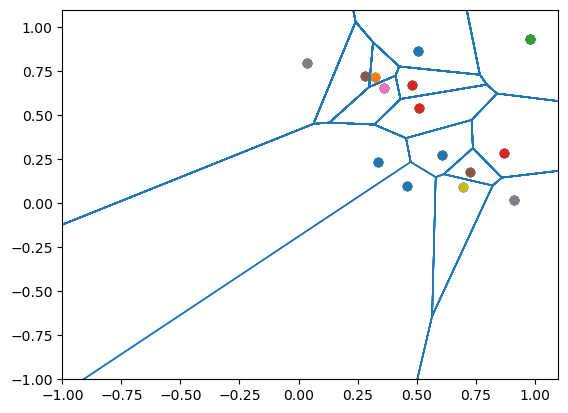

In [80]:
# finally we will call our plotting function
plot_triangle_circum(the_delaunay, circumcenters, False, True, False, True, False, 'final')

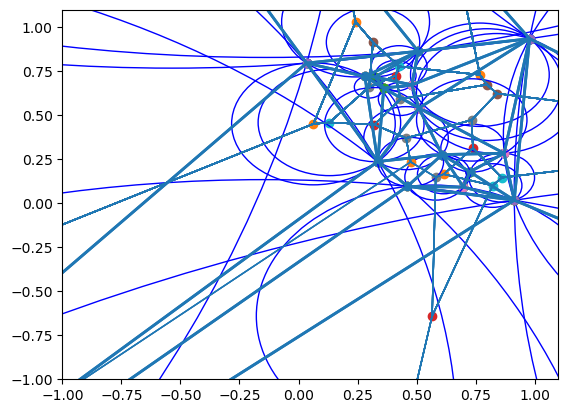

In [81]:
plot_triangle_circum(the_delaunay,circumcenters,True,True,True,True,True,'everything')